## **1. Random forest Classifier**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [35]:
dftrain = pd.read_csv('../data/mobile_train.csv')
dftest = pd.read_csv('../data/mobile_test.csv')

In [36]:
dftrain.head(299)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,832,0,1.6,1,1,1,34,0.3,108,5,...,311,1294,447,15,13,12,1,1,0,0
295,1162,0,2.0,0,0,1,56,0.7,114,7,...,56,997,1652,5,0,20,1,0,0,1
296,1595,1,2.6,0,7,0,12,0.3,121,8,...,344,655,3608,15,1,16,0,1,0,3
297,1329,1,1.0,0,1,0,52,0.9,181,6,...,1053,1458,1228,8,6,6,1,0,1,1


In [37]:
dftest.head(200)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1202,0,0.8,0,2,0,49,0.5,131,...,8,197,1435,1177,15,13,7,1,1,1
196,197,885,0,0.5,1,2,0,3,0.5,163,...,8,813,1666,2887,5,1,13,0,0,1
197,198,1629,1,2.3,0,2,1,2,0.8,86,...,19,1055,1200,2178,19,10,18,1,1,0
198,199,1072,1,0.5,1,6,1,4,0.5,92,...,12,1019,1640,2878,7,5,13,1,0,1


In [38]:
dftrain.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [39]:
dftest.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [40]:
print(dftrain.shape)
print(dftest.shape)

(2000, 21)
(1000, 21)


In [41]:
dftrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [42]:
cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [51]:
len(cols)

20

In [43]:
# label encoder
le = LabelEncoder()

In [45]:
x = dftrain.drop('price_range',axis=1)
y = dftrain.price_range

In [52]:
x.head(2)
print(x.shape)

(2000, 20)


In [56]:
x[cols] = x[cols].apply(LabelEncoder().fit_transform)

In [61]:
model = RandomForestClassifier(criterion = 'entropy',max_depth = 10,n_estimators=100)

In [63]:
model.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [66]:
model.predict(x)

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [68]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,255,0,17,0,1,0,5,5,108,1,2,18,186,963,4,7,17,0,0,1
1,382,1,0,1,0,1,51,6,56,2,6,738,1099,998,12,3,5,1,1,0
2,48,1,0,1,2,1,39,8,65,4,6,962,901,984,6,2,7,1,1,0
3,88,1,20,0,0,0,8,7,51,5,9,935,954,1055,11,8,9,1,0,0
4,954,1,7,0,13,1,42,5,61,1,14,928,517,499,3,2,13,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,0,1,0,7,26,5,14,939,1022,180,8,4,17,1,1,0
1996,1064,1,21,1,0,0,37,1,107,3,3,745,1080,732,6,10,14,1,1,1
1997,1027,0,4,1,1,1,34,6,28,7,3,716,834,1158,4,1,3,1,1,0
1998,732,0,4,0,4,1,44,0,65,4,5,283,120,266,13,10,17,1,1,1


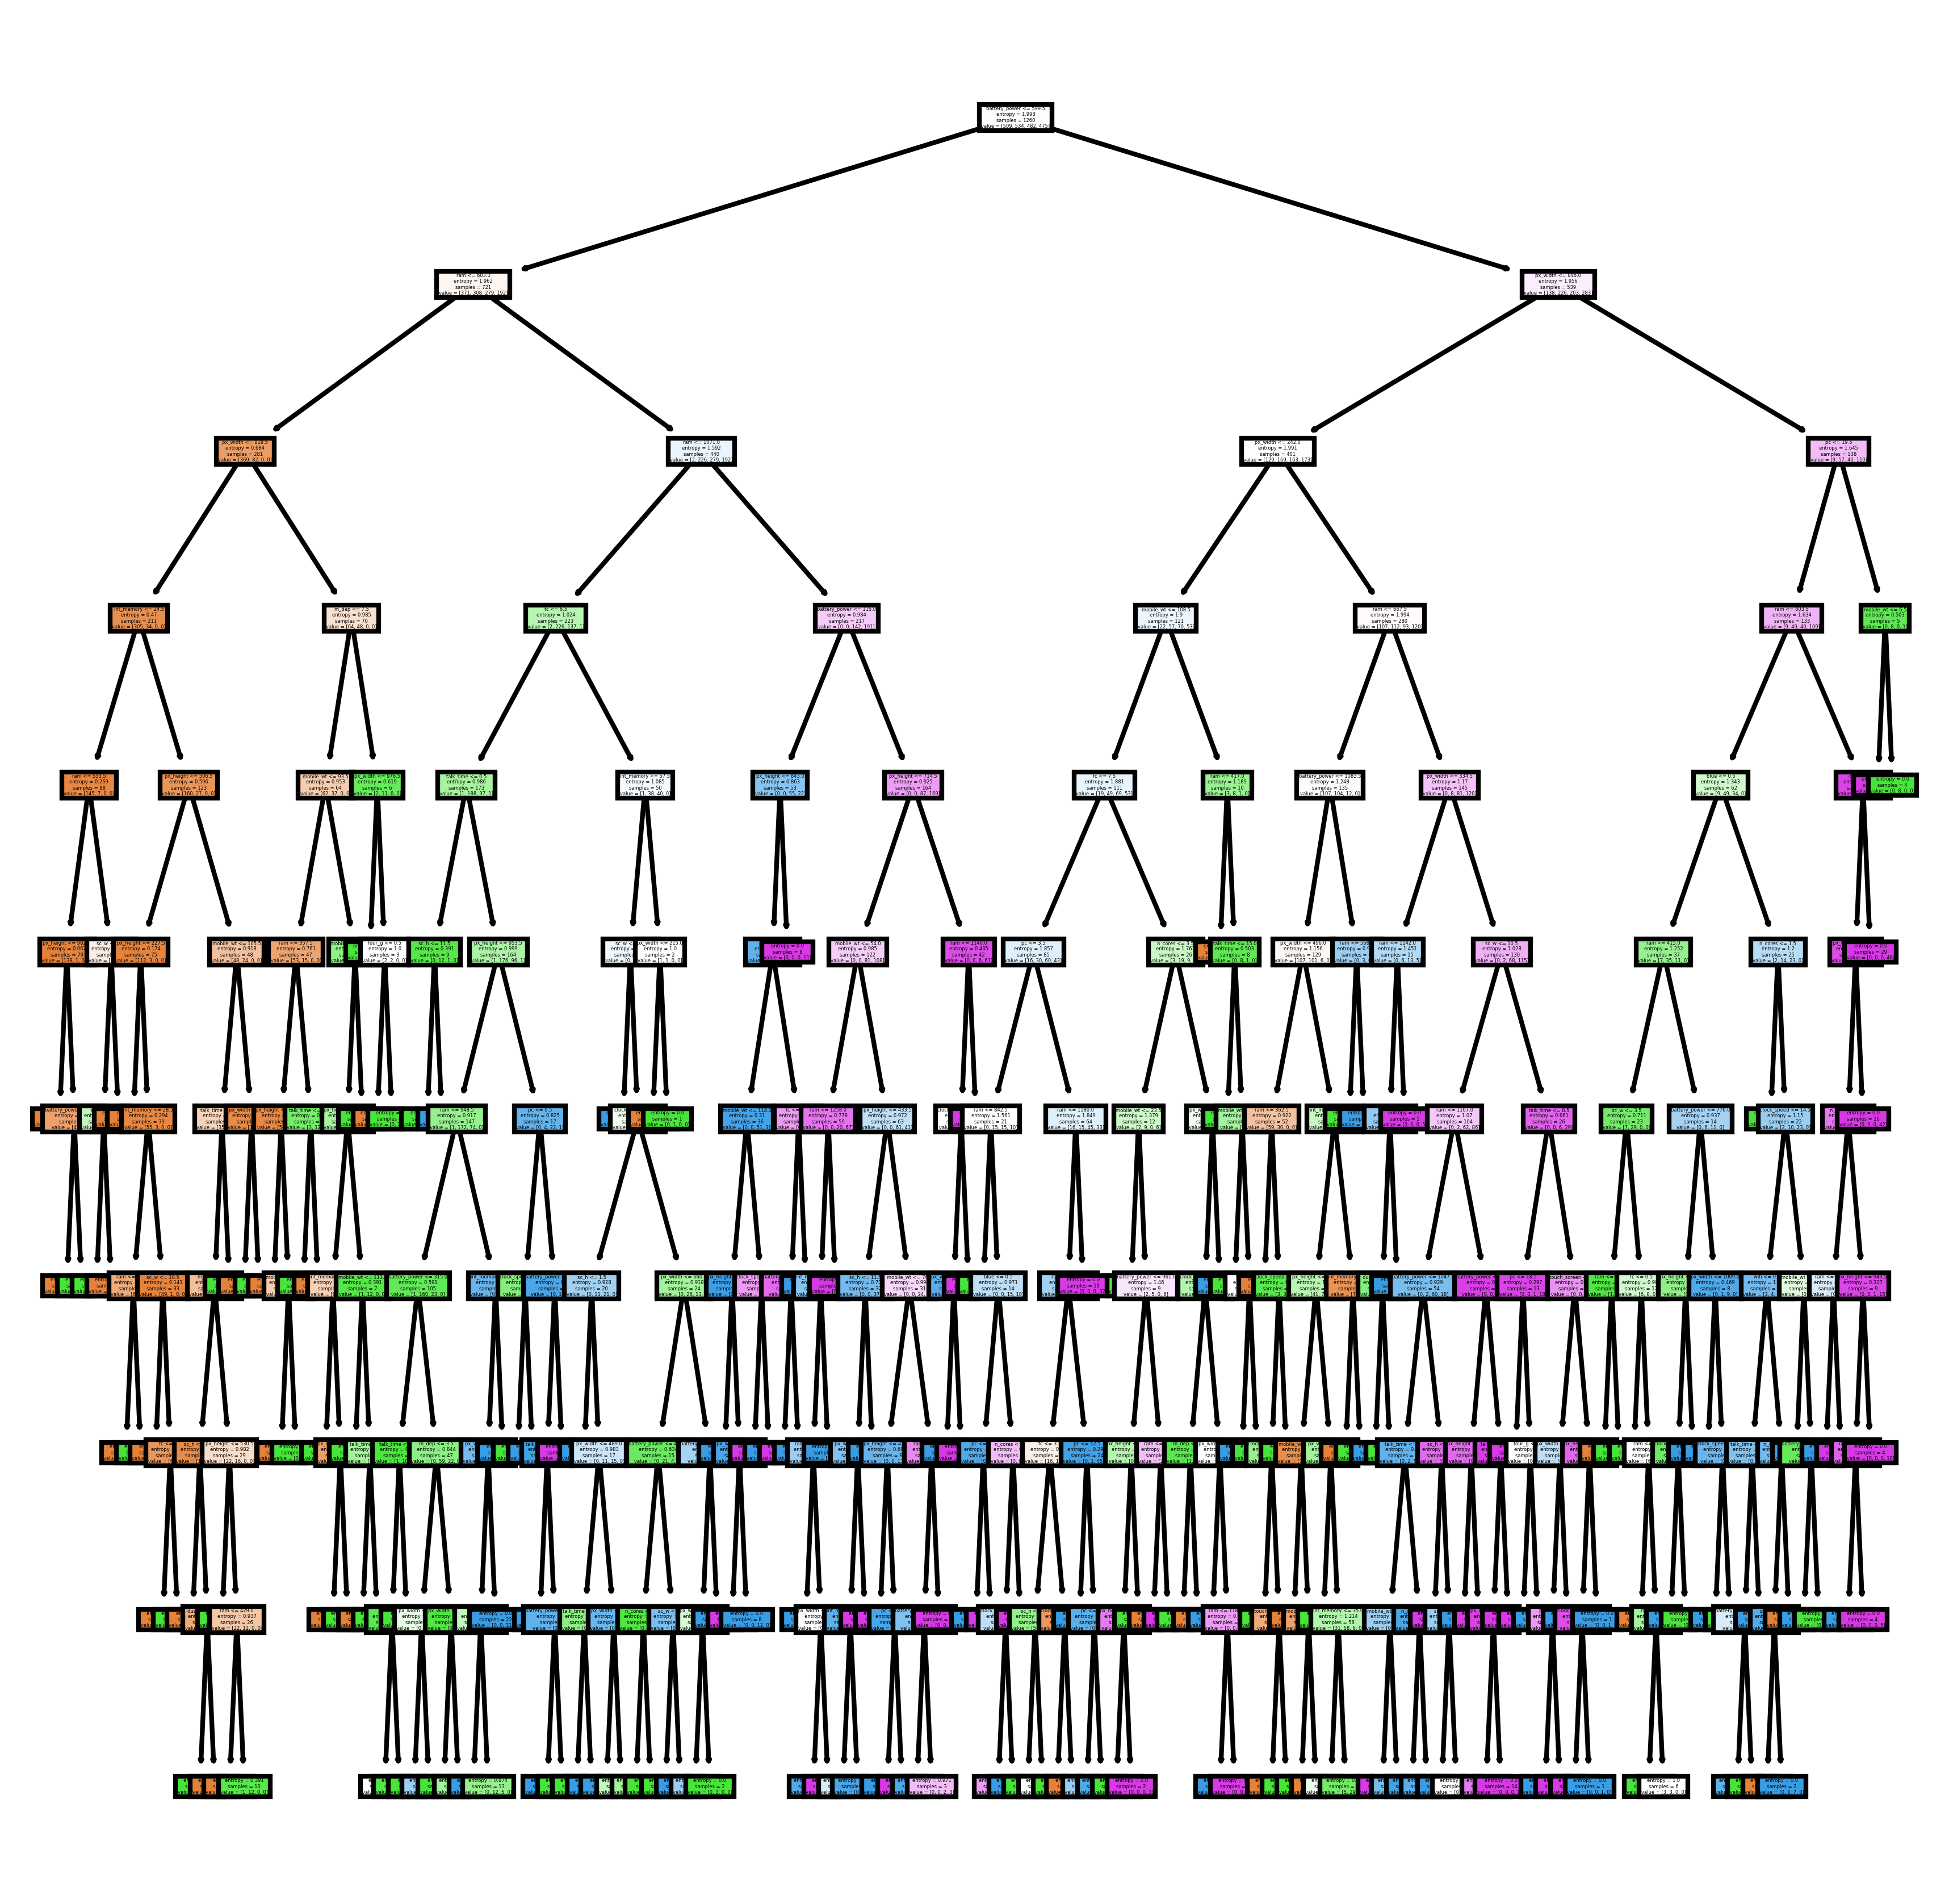

In [ ]:
# plot the random forest
fig = plt.subplots(figsize = (7,7),dpi = 600)
tree.plot_tree(model.estimators_[10],
              feature_names= x.columns,
              filled =True);

In [82]:
dftest

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [81]:
dftest.shape

(1000, 21)

In [78]:
predictions = model.predict(dftest)

D:\ml1\ml1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id

  warnings.warn(message, FutureWarning)


ValueError: X has 21 features, but RandomForestClassifier is expecting 20 features as input.

In [77]:
predictions

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)